## Baseline 1: Logistic Model

This notebook considers training and visualization of the per-patch Logistic Regression model.

In [ ]:
try: # Google Colab integration
  from google.colab import drive

  print('Colab environment detected. Mounting drive...')
  drive.mount('/content/drive')

  print('Mounted. Switching to directory... ', end = '')
  %cd /content/drive/'My Drive'/CILroadseg
  print('done.')
except:
  print('Colab environment not found. Working on ordinary directory.')

Colab environment detected. Mounting drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted. Switching to directory... /content/drive/My Drive/CILroadseg
done.


In [ ]:
import numpy as np
np.random.seed(18)

import tensorflow as tf
tf.random.set_seed(33)

import sys
import os
import matplotlib.image as mpimg

from util.submit import *      # util/submit.py contains the functions used to generate the CSV file for Kaggle Competition
from util.visualize import *   # util/visualize.py provides functions for image visualization
from util.notebooks import *   # util/notebooks.py contains various util functions used in notebooks

## Loading Training Data

`nb_load_data` is an helper function provided in `util/notebooks.py`

In [ ]:
train_dir = "training/images/"
gt_dir = "training/groundtruth/"
test_dir = "test/images/"

X, Y, X_test = nb_load_data(train_dir, gt_dir, test_dir)

Y = (Y >= 0.25) * 1

Loading training input...
Progress: done (100 images).
Loading training groundtruth...
Progress: done (100 images).
Loading test input...
Progress: done (94 images).

       Training data shape: (100, 400, 400, 3)
Training groundtruth shape: (100, 400, 400)
           Test data shape: (94, 608, 608, 3)


## Working with the Model

The `LogisticModel` class is a subclass of `ModelBase`.
This base class can be found in `util/model_base.py` and provides a common interface to all the models we created.

In particular:
- `initialize()` resets the state of the object and should be called before the training starts
- `train(Y, X)` takes the training data `X` and its groundtruth `Y` to train the model
- `classify(X)` returns the predictions for `X`

In [ ]:
from tensorflow import keras

from logistic import *

Using TensorFlow backend.


bright
z200
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 5927489   
Total params: 5,927,489
Trainable params: 5,926,977
Non-trainable params: 512
_________________________________________________________________
Epoch 1/200
 - 133s - loss: 0.7517 - accuracy: 0.7546 - val_loss: 0.5519 - val_accuracy: 0.8379
Epoch 2/200
 - 129s - loss: 0.3979 - accuracy: 0.7905 - val_loss: 0.3900 - val_accuracy: 0.8393
Epoch 3/200
 - 129s - loss: 0.3683 - accuracy: 0.7995 - val_loss: 0.4453 - val_accuracy: 0.8509
Epoch 4/200
 - 129s - loss: 0.3497 - accuracy: 0.8215 - val_loss: 0.3394 - val_accuracy: 0.8455
Epoch 5/200
 - 130s - loss: 0.3296 - accuracy: 0.8548 - val_loss: 0.3450 - val_accuracy: 0.8894
Epoch 6/200
 - 13

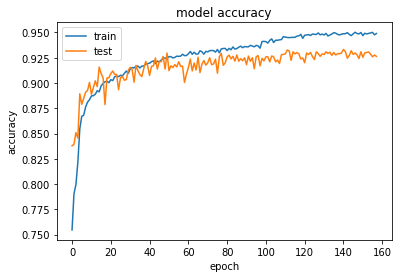

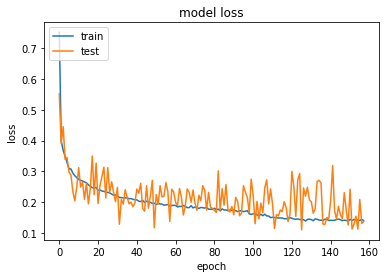

[Target file: saves/final/re1-brightness.h5]
Saving model to disk...done.


In [ ]:
model = LogisticModel()
# Definition of this class can be found in logistic_model.py

model.initialize()
model.train(Y, X)

## Making Predictions with the Model

`LogisticModel.classify(X)` decomposes the images of `X` into patches and does the patchwise classification, but it **does not** recompose the images. This is true for all the patchwise classifiers we created, because having patchwise predictions can be useful in certain cases.

If you want the model to return full masks, you need to wrap it into a `Recomposer` decorator, as below. The implementation of this decorator class can be found in `recomposer.py`.

In [ ]:
from recomposer import *
model = Recomposer(model)

The function `nb_predict_masks` is an helper function provided in `util/notebooks.py`, while `masks_to_submission` is a function based on the implementation provided in the Kaggle competition.

The following two cells can be skipped if you do not want to generate the `.csv` file.

In [ ]:
test_masks_dir = "test/pred/logistic/"
test_dir = "test/images/"
 
nb_predict_masks(model, test_dir, test_masks_dir)

Predicting test cases... 
Progress: done.
Predicting test cases... 
Progress: done.
Predicting test cases... 
Progress: done.


In [ ]:
image_paths = [test_masks_dir + file for file in os.listdir(test_masks_dir)]
masks_to_submission("test/logistic.csv", image_paths)

# Visualizing predictions

The function `view_image_array` is provided in `util/visualize.py`. It uses `matplotlib` to visualize the images and the corresponding predictions.

In [ ]:
Y_pred = model.classify(X_test[0:10])

view_image_array(X_test[0:10], Y_pred)